# Seoul Bike Sharing Demand Data Set

[https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand "https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand") 

The goal of this project is to predict the hourly demand of bike rentals. 

The dataset contains a dependent variable (Rented Bike Count) and 13 independent variables.

In [113]:
import pandas as pd 
import numpy as np 
import os
from pathlib import Path, PurePath
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score,cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest,chi2

seed = 2020

# os.chdir(r'c:\Users\Ben\Box\Benjamin\DataScience\Practice\SeoulBikeSharingDemand')
folder = Path.cwd()
print(folder)

c:\Users\Ben\Box\Benjamin\DataScience\Practice\SeoulBikeSharingDemand


### Read in data

In [114]:
# Read in data 
file_data = 'SeoulBikeData.csv'

df = pd.read_csv(filepath_or_buffer=file_data
                , encoding = "ISO-8859-1")

# converting to a datetime data type
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")                
df_date_range = pd.to_datetime(df['Date'])

print(df.shape)
print(f"\nMin: {df_date_range.min().date()} Max: {df_date_range.max().date()} \n")
print(df.head())

(8760, 14)

Min: 2017-12-01 Max: 2018-11-30 

        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.

### Split Data to train, validation, and test sets.

In [115]:
X = df.drop(['Rented Bike Count'], axis='columns')
y = df['Rented Bike Count']

# Create Test Set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

# Create Validation Set 
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=seed)

#Check by count 
print(f'X_train\t{X_train.shape}\t{len(X_train)/len(df)}')
print(f'y_train\t{y_train.shape}\t\t{len(y_train)/len(df)}')
print(f'X_val\t{X_val.shape}\t{len(X_val)/len(df)}')
print(f'y_val\t{y_val.shape}\t\t{len(y_val)/len(df)}')
print(f'X_test\t{X_test.shape}\t{len(X_test)/len(df)}')
print(f'y_test\t{y_test.shape}\t\t{len(y_test)/len(df)}\n')

X_train	(5256, 13)	0.6
y_train	(5256,)		0.6
X_val	(1752, 13)	0.2
y_val	(1752,)		0.2
X_test	(1752, 13)	0.2
y_test	(1752,)		0.2



## Exploratory Data Analysis

In [116]:
# View the data types and see if there is any missing data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 3354 to 1503
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       5256 non-null   datetime64[ns]
 1   Hour                       5256 non-null   int64         
 2   Temperature(°C)            5256 non-null   float64       
 3   Humidity(%)                5256 non-null   int64         
 4   Wind speed (m/s)           5256 non-null   float64       
 5   Visibility (10m)           5256 non-null   int64         
 6   Dew point temperature(°C)  5256 non-null   float64       
 7   Solar Radiation (MJ/m2)    5256 non-null   float64       
 8   Rainfall(mm)               5256 non-null   float64       
 9   Snowfall (cm)              5256 non-null   float64       
 10  Seasons                    5256 non-null   object        
 11  Holiday                    5256 non-null   object        
 12  Fun

In [117]:
print(X_train.describe())

             Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count  5256.00000      5256.000000  5256.000000       5256.000000   
mean     11.55156        12.770472    58.251903          1.717580   
std       6.93202        11.903115    20.382762          1.040778   
min       0.00000       -17.500000     0.000000          0.000000   
25%       6.00000         3.200000    42.000000          0.900000   
50%      11.00000        13.700000    57.000000          1.500000   
75%      18.00000        22.400000    74.000000          2.300000   
max      23.00000        39.400000    98.000000          7.300000   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count       5256.000000                5256.000000              5256.000000   
mean        1437.424087                   3.960198                 0.561417   
std          609.151519                  12.989088                 0.860131   
min           27.000000                 -30.600000            

In [118]:
y_train.describe()

count    5256.000000
mean      707.515221
std       654.781206
min         0.000000
25%       189.000000
50%       497.500000
75%      1070.000000
max      3556.000000
Name: Rented Bike Count, dtype: float64

There are no missing values in any column. After turning the date column into to datetime we have the correct data types. There are 3 columns that will need to be turned into dummy variables.

In [119]:
print(X_train[['Seasons','Holiday','Functioning Day']].nunique() )

Seasons            4
Holiday            2
Functioning Day    2
dtype: int64


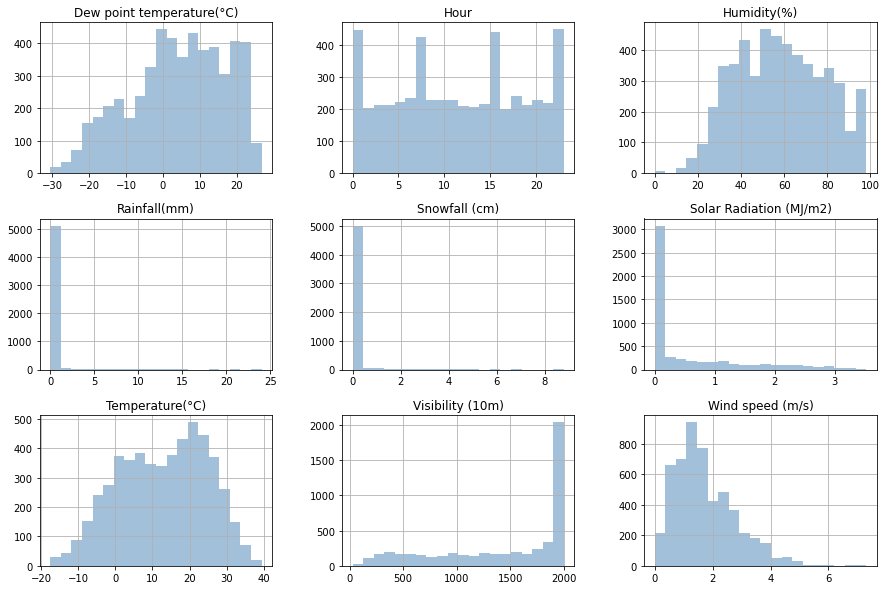

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EE1118E20>,
      dtype=object)

In [120]:
# The Distributions of all the numeric variables
X_train.hist(color='steelblue', alpha=0.5, figsize=(15,10), bins=20)


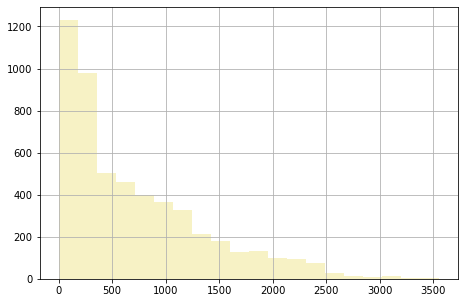

In [121]:
y_train.hist(color='khaki', alpha=0.5, figsize=(7.5,5), bins=20)

After looking at the distribution of the numeric variables we see the number of bikes rented has a Poisson distribution. Wind speed, Visibility (10m), Solar Radiation, Rainfall and Snowfall have either a floor or a ceiling. Temperature & Humidity is close to normally distributed.

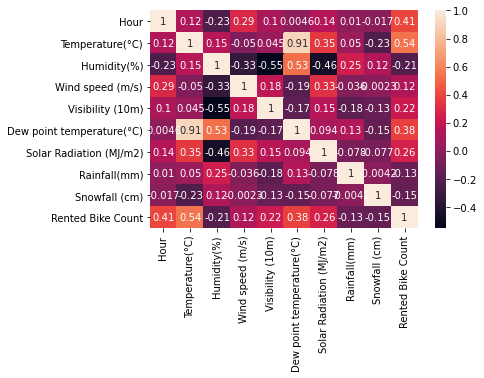

In [122]:
# Correlation Matrix
all_train = pd.concat([X_train, y_train], axis=1)
all_train_marix = all_train.corr()
sns.heatmap(all_train_marix, annot=True)
plt.show()

### **Correlation**

Temperature and Dew point temperature are highly correlated. Dew point temperature should be dropped because it has less correlation with Rented Bike Count.

The order of most correlated variable ranked from high to low.

1.  Temperature
2.  Hour
3.  Solar Radiation
4.  Visibility
5.  Humidity
6.  Snowfall
7.  Rainfall
8.  Windspeed

## Prepare the Data for Machine Learning Model

We will turn Seasons, Holiday, and Functioning Day into dummy variables. We will break down date into:

1.  Year
2.  Month
3.  Day
4.  Week Day
5.  Day of Week

We will also drop ‘Dew point temperature’ and scale the variables with a min max scaler.

In [123]:
# Create a funtion for data preperation and cleaning
# ------------------------------------------------------------------------------

def date_prep(DataFrame, Date_Column, Drop_Colum):
    """Takes a date column from a DataFrame and adds Year_Month, Year, Month, Day
    , Week_Day, and Day_of_Week"""
    # DataFrame['Year_Month'] = DataFrame['Date']
    DataFrame['Year'] = DataFrame[Date_Column].dt.year
    DataFrame['Month'] = DataFrame[Date_Column].dt.month
    DataFrame['Day'] = DataFrame[Date_Column].dt.day
    DataFrame['Day_of_Week'] = DataFrame[Date_Column].dt.dayofweek
    DataFrame['Week_Day'] = np.where(DataFrame['Day_of_Week'] >= 5, 1, 0)
    DataFrame.drop([Date_Column],axis=1, inplace=True)

In [124]:
# Prepare the Train Data set
X_train_1 = X_train.copy()
# Break down date into pieces
date_prep(X_train_1,'Date', Drop_Colum = False)
print(X_train_1.shape)
# print(X_train_1.head())

# Create Dummy Variables
df_D1 = pd.get_dummies(X_train_1['Seasons']
                            , prefix='Season'
                            , prefix_sep='_'
                            , drop_first=True)
df_D2 = pd.get_dummies(X_train_1['Holiday']
                            # , prefix='Holiday'
                            , prefix_sep='_'
                            , drop_first=True)
df_D3 = pd.get_dummies(X_train_1['Functioning Day']
                            , prefix='OperatingDay'
                            , prefix_sep='_'
                            , drop_first=True)

X_train_2 = pd.concat([X_train_1, df_D1, df_D2, df_D3], axis=1, sort=False)
X_train_2.drop(['Seasons','Holiday','Functioning Day'],axis=1, inplace=True)

# Drop 'Dew point temperature(°C)'
X_train_2.drop(['Dew point temperature(°C)'],axis=1, inplace=True)



print(X_train_2.shape)
print(X_train_2.head())

min_max_scaler = preprocessing.MinMaxScaler()
X_train_2_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_train_2), columns=X_train_2.columns)
print(X_train_2_minmax.head())

(5256, 17)
(5256, 18)
      Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
3354    18             19.1           31               3.0               958   
323     11             -6.1           38               1.0              1587   
7917    21             10.6           70               2.4              2000   
1681     1             -4.8           44               1.1              1432   
1416     0             -9.3           45               0.7              1976   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Year  Month  Day  \
3354                     0.70           0.0            0.0  2018      4   19   
323                      0.52           0.0            0.0  2017     12   14   
7917                     0.00           0.0            0.0  2018     10   26   
1681                     0.00           0.0            0.0  2018      2    9   
1416                     0.00           0.0            0.0  2018      1   29   

      Day_of_Wee

In [125]:
# Prepare the Valudation Data Set
X_val_1 = X_val.copy()
# Break down date into pieces
date_prep(X_val_1,'Date', Drop_Colum = False)
print(X_val_1.shape)
# print(X_val_1.head())

# Create Dummy Variables
df_D1 = pd.get_dummies(X_val_1['Seasons']
                            , prefix='Season'
                            , prefix_sep='_'
                            , drop_first=True)
df_D2 = pd.get_dummies(X_val_1['Holiday']
                            # , prefix='Holiday'
                            , prefix_sep='_'
                            , drop_first=True)
df_D3 = pd.get_dummies(X_val_1['Functioning Day']
                            , prefix='OperatingDay'
                            , prefix_sep='_'
                            , drop_first=True)

X_val_2 = pd.concat([X_val_1, df_D1, df_D2, df_D3], axis=1, sort=False)
X_val_2.drop(['Seasons','Holiday','Functioning Day'],axis=1, inplace=True)

# Drop 'Dew point temperature(°C)'
X_val_2.drop(['Dew point temperature(°C)'],axis=1, inplace=True)



print(X_val_2.shape)
# print(X_val_2.head())

min_max_scaler = preprocessing.MinMaxScaler()
X_val_2_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_val_2), columns=X_val_2.columns)
print(X_val_2_minmax.head())

(1752, 17)
(1752, 18)
       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  1.000000         0.628623     0.857143          0.160714          1.000000   
1  0.130435         0.661232     0.775510          0.089286          0.957274   
2  0.391304         0.699275     0.653061          0.196429          0.595626   
3  0.391304         0.713768     0.826531          0.410714          0.831638   
4  0.695652         0.943841     0.459184          0.410714          0.728383   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Year     Month  \
0                 0.000000           0.0            0.0   1.0  0.818182   
1                 0.000000           0.0            0.0   1.0  0.727273   
2                 0.327536           0.0            0.0   1.0  0.727273   
3                 0.347826           0.0            0.0   1.0  0.727273   
4                 0.715942           0.0            0.0   1.0  0.545455   

        Day  Day_of_Week  Week_Day  Seas

In [126]:
# Prepare the Test Data Set
X_test_1 = X_test.copy()
# Break down date into pieces
date_prep(X_test_1,'Date', Drop_Colum = False)
print(X_test_1.shape)
# print(X_test_1.head())

# Create Dummy Variables
df_D1 = pd.get_dummies(X_test_1['Seasons']
                            , prefix='Season'
                            , prefix_sep='_'
                            , drop_first=True)
df_D2 = pd.get_dummies(X_test_1['Holiday']
                            # , prefix='Holiday'
                            , prefix_sep='_'
                            , drop_first=True)
df_D3 = pd.get_dummies(X_test_1['Functioning Day']
                            , prefix='OperatingDay'
                            , prefix_sep='_'
                            , drop_first=True)

X_test_2 = pd.concat([X_test_1, df_D1, df_D2, df_D3], axis=1, sort=False)
X_test_2.drop(['Seasons','Holiday','Functioning Day'],axis=1, inplace=True)

# Drop 'Dew point temperature(°C)'
X_test_2.drop(['Dew point temperature(°C)'],axis=1, inplace=True)



print(X_test_2.shape)
# print(X_test_2.head())

min_max_scaler = preprocessing.MinMaxScaler()
X_test_2_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_test_2), columns=X_test_2.columns)
print(X_test_2_minmax.head())

(1752, 17)
(1752, 18)
       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  0.652174         0.434164     0.214286          0.364865          0.948294   
1  0.695652         0.966192     0.357143          0.175676          1.000000   
2  0.260870         0.471530     0.857143          0.094595          0.121510   
3  0.608696         0.674377     0.285714          0.378378          0.581696   
4  0.434783         0.606762     0.459184          0.283784          1.000000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Year     Month  \
0                 0.630682           0.0            0.0   1.0  0.090909   
1                 0.568182           0.0            0.0   1.0  0.636364   
2                 0.000000           0.0            0.0   1.0  0.181818   
3                 0.781250           0.0            0.0   1.0  0.181818   
4                 0.741477           0.0            0.0   1.0  0.363636   

        Day  Day_of_Week  Week_Day  Seas

In [127]:
print(f'X_train_2_minmax {X_train_2_minmax.shape} ')
print(f'y_train\t{y_train.shape}')
print(f'X_val_2_minmax {X_val_2_minmax.shape}')
print(f'y_val\t{y_val.shape}')
print(f'X_test_2_minmax {X_test_2_minmax.shape}')
print(f'y_test\t{y_test.shape} \n')

X_train_2_minmax (5256, 18) 
y_train	(5256,)
X_val_2_minmax (1752, 18)
y_val	(1752,)
X_test_2_minmax (1752, 18)
y_test	(1752,) 



##  Short List Promising Models

1.  Linear Regression
2.  Decision Tree
3.  Random Forest
4.  SVM
5.  XGBoost

In [128]:
#  Get right data frame names
X_train = X_train_2_minmax.copy()
X_val = X_val_2_minmax.copy()
X_test = X_test_2_minmax.copy()

print(f'X_train {X_train.shape} ')
print(f'y_train\t{y_train.shape}')
print(f'X_val {X_val.shape}')
print(f'y_val\t{y_val.shape}')
print(f'X_test {X_test.shape}')
print(f'y_test\t{y_test.shape} \n')

# Create Scored DF
df_score = pd.DataFrame(columns=['Dataset'
                                ,'Model'
                                ,'MAE_Mean'
                                ,'MSE_Mean'
                                ,'RMSE_Mean'
                                ,'RMSE_StandDev'
                                ,'R2'
                                ])

# Create scoring list
scor = ['r2','neg_root_mean_squared_error','neg_mean_absolute_error','neg_mean_squared_error']

X_train (5256, 18) 
y_train	(5256,)
X_val (1752, 18)
y_val	(1752,)
X_test (1752, 18)
y_test	(1752,) 



In [129]:
# Linear Regression
t1000 = dt.datetime.now()

lm_score = cross_validate(estimator=LinearRegression()
                            ,X=X_train
                            ,y=y_train
                            ,scoring=scor
                            ,cv=10)
# Get the scores
df_lm_scores = pd.DataFrame(lm_score)

# Add scores to df
df_score = df_score.append({'Dataset':'Train'
                                ,'Model':'Lin Reg'
                                ,'MAE_Mean':-df_lm_scores['test_neg_mean_absolute_error'].mean()
                                ,'MSE_Mean':-df_lm_scores['test_neg_mean_squared_error'].mean()
                                ,'RMSE_Mean':-df_lm_scores['test_neg_root_mean_squared_error'].mean()
                                ,'RMSE_StandDev':df_lm_scores['test_neg_root_mean_squared_error'].std()
                                ,'R2':df_lm_scores['test_r2'].mean()
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')                    



The block took 0:00:00.165557 (H:MM:SS)


In [130]:
# Decision Tree
t1000 = dt.datetime.now()

dt_score = cross_validate(estimator=DecisionTreeRegressor()
                            ,X=X_train
                            ,y=y_train
                            ,scoring=scor
                            ,cv=10)
# Get the scores
df_dt_scores = pd.DataFrame(dt_score)

# Add scores to df
df_score = df_score.append({'Dataset':'Train'
                                ,'Model':'Decision Tree'
                                ,'MAE_Mean':-df_dt_scores['test_neg_mean_absolute_error'].mean()
                                ,'MSE_Mean':-df_dt_scores['test_neg_mean_squared_error'].mean()
                                ,'RMSE_Mean':-df_dt_scores['test_neg_root_mean_squared_error'].mean()
                                ,'RMSE_StandDev':df_dt_scores['test_neg_root_mean_squared_error'].std()
                                ,'R2':df_dt_scores['test_r2'].mean()
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')                    



The block took 0:00:00.554524 (H:MM:SS)


In [131]:
# Random Forest 
t1000 = dt.datetime.now()

rf_score = cross_validate(estimator=RandomForestRegressor()
                            ,X=X_train
                            ,y=y_train.values.ravel()
                            ,scoring=scor
                            ,cv=10)
# Get the scores
df_rf_scores = pd.DataFrame(rf_score)

# Add scores to df
df_score = df_score.append({'Dataset':'Train'
                                ,'Model':'Rand Forest'
                                ,'MAE_Mean':-df_rf_scores['test_neg_mean_absolute_error'].mean()
                                ,'MSE_Mean':-df_rf_scores['test_neg_mean_squared_error'].mean()
                                ,'RMSE_Mean':-df_rf_scores['test_neg_root_mean_squared_error'].mean()
                                ,'RMSE_StandDev':df_rf_scores['test_neg_root_mean_squared_error'].std()
                                ,'R2':df_rf_scores['test_r2'].mean()
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')   



The block took 0:00:30.745617 (H:MM:SS)


In [132]:
# SVM
t1000 = dt.datetime.now()

svm_score = cross_validate(estimator=SVR() #C=1.0, epsilon=0.2
                            ,X=X_train
                            ,y=y_train.values.ravel()
                            ,scoring=scor
                            ,cv=10)
# Get the scores
df_svm_scores = pd.DataFrame(svm_score)

# Add scores to df
df_score = df_score.append({'Dataset':'Train'
                                ,'Model':'SVM'
                                ,'MAE_Mean':-df_svm_scores['test_neg_mean_absolute_error'].mean()
                                ,'MSE_Mean':-df_svm_scores['test_neg_mean_squared_error'].mean()
                                ,'RMSE_Mean':-df_svm_scores['test_neg_root_mean_squared_error'].mean()
                                ,'RMSE_StandDev':df_svm_scores['test_neg_root_mean_squared_error'].std()
                                ,'R2':df_svm_scores['test_r2'].mean()
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')  



The block took 0:00:19.093051 (H:MM:SS)


In [133]:
# XGBoost
t1000 = dt.datetime.now()

xgb_score = cross_validate(estimator=xgb.XGBRegressor() 
                            ,X=X_train
                            ,y=y_train
                            ,scoring=scor
                            ,cv=10)
# Get the scores
df_xgb_scores = pd.DataFrame(xgb_score)

# Add scores to df
df_score = df_score.append({'Dataset':'Train'
                                ,'Model':'XGB'
                                ,'MAE_Mean':-df_xgb_scores['test_neg_mean_absolute_error'].mean()
                                ,'MSE_Mean':-df_xgb_scores['test_neg_mean_squared_error'].mean()
                                ,'RMSE_Mean':-df_xgb_scores['test_neg_root_mean_squared_error'].mean()
                                ,'RMSE_StandDev':df_xgb_scores['test_neg_root_mean_squared_error'].std()
                                ,'R2':df_xgb_scores['test_r2'].mean()
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')  



The block took 0:00:04.197755 (H:MM:SS)


In [134]:
print(df_score)

  Dataset          Model    MAE_Mean       MSE_Mean   RMSE_Mean  \
0   Train        Lin Reg  327.533141  189853.438355  435.202506   
1   Train  Decision Tree  145.606922   67295.584608  258.828918   
2   Train    Rand Forest  108.207750   33995.977567  183.545139   
3   Train            SVM  411.969877  356116.848303  596.100051   
4   Train            XGB  103.088422   27737.381048  166.038309   

   RMSE_StandDev        R2  
0      22.415701  0.556232  
1      18.353801  0.840868  
2      18.473993  0.919848  
3      29.468968  0.168636  
4      13.689454  0.934621  


## Fine-Tune the System

In [135]:
t1000 = dt.datetime.now()

param_grid = [ 
    {'n_estimators': [50, 100, 500, 1000, 1500]
        , 'max_depth': [5,10]}
    # , {'booster': ['gblinear']
    #     , 'n_estimators': [50, 80,100]
    #     , 'max_depth': [10,15]},
     ] 
xgb_reg = xgb.XGBRegressor()
grid_search = GridSearchCV( xgb_reg
                            ,param_grid
                            ,cv = 5
                            ,scoring ='neg_root_mean_squared_error'
                            ,return_train_score = True
                            ,refit='neg_root_mean_squared_error')
grid_search.fit( X_train, y_train.values.ravel())

print(grid_search.best_params_)
print(grid_search.best_estimator_)


print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')

{'max_depth': 10, 'n_estimators': 1000}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


The block took 0:01:46.066716 (H:MM:SS)


In [136]:
# XGBoost
t1000 = dt.datetime.now()

xgb_score = cross_validate(estimator=xgb.XGBRegressor(max_depth=10,n_estimators=1000) 
                            ,X=X_train
                            ,y=y_train
                            ,scoring=scor
                            ,cv=10)
# Get the scores
df_xgb_scores = pd.DataFrame(xgb_score)

# Add scores to df
df_score = df_score.append({'Dataset':'Train'
                                ,'Model':'XGB'
                                ,'MAE_Mean':-df_xgb_scores['test_neg_mean_absolute_error'].mean()
                                ,'MSE_Mean':-df_xgb_scores['test_neg_mean_squared_error'].mean()
                                ,'RMSE_Mean':-df_xgb_scores['test_neg_root_mean_squared_error'].mean()
                                ,'RMSE_StandDev':df_xgb_scores['test_neg_root_mean_squared_error'].std()
                                ,'R2':df_xgb_scores['test_r2'].mean()
                                , 'Hyperparameters ':"max_depth=10,n_estimators=1000"
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')



The block took 0:00:41.628862 (H:MM:SS)


In [137]:
print(df_score)

  Dataset          Model    MAE_Mean       MSE_Mean   RMSE_Mean  \
0   Train        Lin Reg  327.533141  189853.438355  435.202506   
1   Train  Decision Tree  145.606922   67295.584608  258.828918   
2   Train    Rand Forest  108.207750   33995.977567  183.545139   
3   Train            SVM  411.969877  356116.848303  596.100051   
4   Train            XGB  103.088422   27737.381048  166.038309   
5   Train            XGB   94.742848   27461.917844  165.005591   

   RMSE_StandDev        R2                Hyperparameters   
0      22.415701  0.556232                             NaN  
1      18.353801  0.840868                             NaN  
2      18.473993  0.919848                             NaN  
3      29.468968  0.168636                             NaN  
4      13.689454  0.934621                             NaN  
5      16.161440  0.935259  max_depth=10,n_estimators=1000  


## Final Test

### **Validate**

In [138]:
t1000 = dt.datetime.now()

mod_xgb = xgb.XGBRegressor(max_depth=10,n_estimators=1000)

mod_xgb.fit(X_train, y_train)
predictions = mod_xgb.predict(X_val)

val_mae = mean_absolute_error(y_val, predictions)
val_mse = mean_squared_error(y_val, predictions)
val_rmse = np.sqrt(val_mse) 
val_r2 = r2_score(y_val, predictions)

# print(f'Validation MAE: {val_mae:,.4f}')
# print(f'Validation MSE: {val_mse:,.4f}')
# print(f'Validation RMSE: {val_rmse:,.4f}')
# print(f'Validation R2: {val_r2:,.4f}')

# Add scores to df
df_score = df_score.append({'Dataset':'Validate'
                                ,'Model':'XGB'
                                ,'MAE_Mean':val_mae
                                ,'MSE_Mean':val_mse
                                ,'RMSE_Mean':val_rmse
                                ,'RMSE_StandDev': None
                                ,'R2':val_r2
                                , 'Hyperparameters ':"max_depth=10,n_estimators=1000"
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')



The block took 0:00:04.161387 (H:MM:SS)


### **Test**

In [139]:
t1000 = dt.datetime.now()

test_predictions = mod_xgb.predict(X_test)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse) 
test_r2 = r2_score(y_test, test_predictions)

# Add scores to df
df_score = df_score.append({'Dataset':'Test'
                                ,'Model':'XGB'
                                ,'MAE_Mean':test_mae
                                ,'MSE_Mean':test_mse
                                ,'RMSE_Mean':test_rmse
                                ,'RMSE_StandDev': None
                                ,'R2':test_r2
                                , 'Hyperparameters ':"max_depth=10,n_estimators=1000"
                                }
                            , ignore_index=True)

print('\n\nThe block took', dt.datetime.now()-t1000, '(H:MM:SS)')



The block took 0:00:00.085770 (H:MM:SS)


In [140]:
print(df_score)

    Dataset          Model    MAE_Mean       MSE_Mean   RMSE_Mean  \
0     Train        Lin Reg  327.533141  189853.438355  435.202506   
1     Train  Decision Tree  145.606922   67295.584608  258.828918   
2     Train    Rand Forest  108.207750   33995.977567  183.545139   
3     Train            SVM  411.969877  356116.848303  596.100051   
4     Train            XGB  103.088422   27737.381048  166.038309   
5     Train            XGB   94.742848   27461.917844  165.005591   
6  Validate            XGB  101.062973   28568.056661  169.020876   
7      Test            XGB   95.851917   25987.424516  161.206155   

  RMSE_StandDev        R2                Hyperparameters   
0       22.4157  0.556232                             NaN  
1       18.3538  0.840868                             NaN  
2        18.474  0.919848                             NaN  
3        29.469  0.168636                             NaN  
4       13.6895  0.934621                             NaN  
5       16.1614  0